In [18]:
import os, shutil

original_dataset_dir = "C:/Users/usaid/Downloads/chest_xray"

base_dir = "C:/Users/usaid/Documents/chest-xray1" 
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir) 

validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir) 

test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir)

train_normal_dir = os.path.join(train_dir, 'NORMAL') 
os.mkdir(train_normal_dir)

train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA') 
os.mkdir(train_pneumonia_dir)

validation_normal_dir = os.path.join(validation_dir, 'NORMAL') 
os.mkdir(validation_normal_dir)

validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA') 
os.mkdir(validation_pneumonia_dir)

test_normal_dir = os.path.join(test_dir, 'NORMAL') 
os.mkdir(test_normal_dir)

test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA') 
os.mkdir(test_pneumonia_dir)

In [19]:
path = "C:/Users/usaid/Downloads/chest_xray/train/NORMAL"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'captured'+str(i)+'.jpg'))
    i = i +1
    
path = "C:/Users/usaid/Downloads/chest_xray/val/NORMAL"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'captured'+str(i)+'.jpg'))
    i = i +1
    
path = "C:/Users/usaid/Downloads/chest_xray/test/NORMAL"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'captured'+str(i)+'.jpg'))
    i = i +1

path = "C:/Users/usaid/Downloads/chest_xray/test/PNEUMONIA"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'captured'+str(i)+'.jpg'))
    i = i +1

path = "C:/Users/usaid/Downloads/chest_xray/train/PNEUMONIA"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'captured'+str(i)+'.jpg'))
    i = i +1

path = "C:/Users/usaid/Downloads/chest_xray/val/PNEUMONIA"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'captured'+str(i)+'.jpg'))
    i = i +1

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/usaid/Downloads/chest_xray/train/NORMAL\\captured10.jpg' -> 'C:/Users/usaid/Downloads/chest_xray/train/NORMAL\\captured2.jpg'

In [20]:
path = "/Users/usaid/Downloads/chest_xray/train/NORMAL"
fnames = ['captured{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames: 
    src = os.path.join(path, fname) 
    dst = os.path.join(train_normal_dir, fname) 
    shutil.copyfile(src, dst) 

In [21]:
path = "C:/Users/usaid/Downloads/chest_xray/val/NORMAL"
fnames = ['captured{}.jpg'.format(i) for i in range(0, 7)]
for fname in fnames:
    src = os.path.join(path, fname)
    dst = os.path.join(validation_normal_dir, fname) 
    shutil.copyfile(src, dst)

In [22]:
path =  "C:/Users/usaid/Downloads/chest_xray/test/NORMAL"
fnames = ['captured{}.jpg'.format(i) for i in range(0, 233)]
for fname in fnames:
    src = os.path.join(path, fname)
    dst = os.path.join(test_normal_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
path =  "C:/Users/usaid/Downloads/chest_xray/train/PNEUMONIA"
fnames = ['captured{}.jpg'.format(i) for i in range(0,3874)]
for fname in fnames:
    src = os.path.join(path, fname) 
    dst = os.path.join(train_pneumonia_dir, fname) 
    shutil.copyfile(src, dst)

In [24]:
path = "C:/Users/usaid/Downloads/chest_xray/test/PNEUMONIA"
fnames = ['captured{}.jpg'.format(i) for i in range(0, 289)]
for fname in fnames:
    src = os.path.join(path, fname) 
    dst = os.path.join(validation_pneumonia_dir, fname) 
    shutil.copyfile(src, dst)

In [25]:
path = "C:/Users/usaid/Downloads/chest_xray/val/PNEUMONIA"
fnames = ['captured{}.jpg'.format(i) for i in range(0, 7)]
for fname in fnames:
    src = os.path.join(path, fname) 
    dst = os.path.join(test_pneumonia_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
print("total training normal images:", len(os.listdir(train_normal_dir)))
 
print("total training pneumonia images:", len(os.listdir(train_pneumonia_dir)))
 
print("total validation normal images:", len(os.listdir(validation_normal_dir)))
 
print("total validation pneumonia images:", len(os.listdir(validation_pneumonia_dir)))
 
print("total test normal images:", len(os.listdir(test_normal_dir))) 
 
print("total test pneumonia images:", len(os.listdir(test_pneumonia_dir)))

total training normal images: 1000
total training pneumonia images: 3874
total validation normal images: 7
total validation pneumonia images: 289
total test normal images: 233
total test pneumonia images: 7


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory( 
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4874 images belonging to 2 classes.
Found 296 images belonging to 2 classes.


In [28]:
datagen = ImageDataGenerator(
    rotation_range=0.0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest')

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_normal_dir, fname)
          for fname in os.listdir(train_normal_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

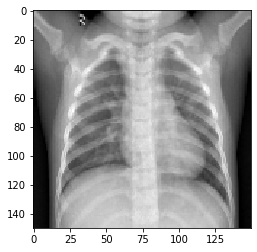

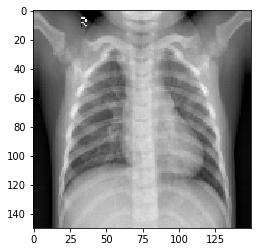

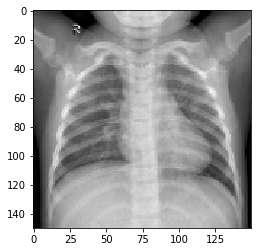

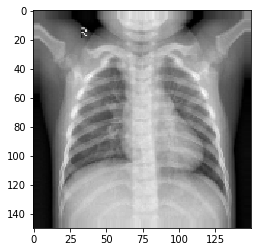

In [30]:
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0

for batch in datagen.flow(x, batch_size=1): 
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1 
    if i % 4 == 0: break

plt.show()

In [31]:
from tensorflow.keras import layers 
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (5, 5), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer="RMSprop",
              metrics=['acc'])

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode="nearest")

In [33]:
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150, 150),
batch_size = 32,
class_mode = "binary")

Found 4874 images belonging to 2 classes.


In [34]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150, 150),
batch_size = 32,
class_mode = "binary")

Found 296 images belonging to 2 classes.


In [35]:
history = model.fit_generator(
train_generator,
epochs = 25,
validation_data = validation_generator)

Epoch 1/25
153/153 [==============================] - 81s 528ms/step - loss: 0.4892 - acc: 0.8049 - val_loss: 0.1594 - val_acc: 0.9426
Epoch 2/25
153/153 [==============================] - 60s 391ms/step - loss: 0.2936 - acc: 0.8865 - val_loss: 0.0882 - val_acc: 0.9764
Epoch 3/25
153/153 [==============================] - 63s 415ms/step - loss: 0.2093 - acc: 0.9220 - val_loss: 0.0901 - val_acc: 0.9595
Epoch 4/25
153/153 [==============================] - 63s 411ms/step - loss: 0.1838 - acc: 0.9286 - val_loss: 0.0832 - val_acc: 0.9628
Epoch 5/25
153/153 [==============================] - 63s 409ms/step - loss: 0.1617 - acc: 0.9372 - val_loss: 0.0720 - val_acc: 0.9764
Epoch 6/25
153/153 [==============================] - 63s 409ms/step - loss: 0.1390 - acc: 0.9503 - val_loss: 0.0853 - val_acc: 0.9730
Epoch 7/25
153/153 [==============================] - 62s 405ms/step - loss: 0.1491 - acc: 0.9444 - val_loss: 0.0532 - val_acc: 0.9797
Epoch 8/25
153/153 [==============================] - 6

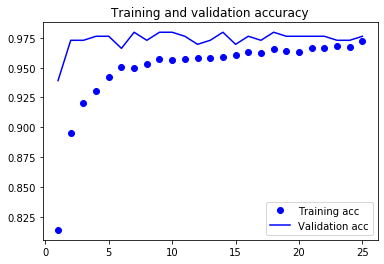

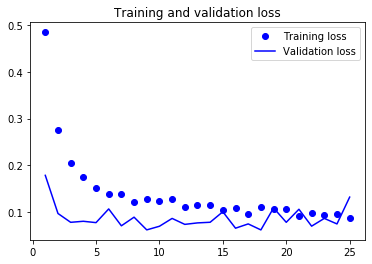

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [47]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size = (150, 150),
batch_size = 32,
class_mode = "binary")
model.predict(test_generator)

Found 240 images belonging to 2 classes.


array([[5.19207418e-02],
       [9.92332578e-01],
       [9.99534249e-01],
       [9.99830127e-01],
       [9.65728879e-01],
       [9.75706875e-01],
       [9.97070193e-01],
       [9.99648094e-01],
       [9.28957939e-01],
       [7.69786239e-02],
       [9.99620318e-01],
       [8.84910583e-01],
       [9.99981642e-01],
       [7.21822500e-01],
       [2.58529931e-01],
       [8.93518031e-02],
       [9.99349475e-01],
       [3.17564607e-03],
       [1.15175813e-01],
       [3.41665447e-01],
       [9.99999881e-01],
       [9.81690168e-01],
       [5.74627221e-02],
       [1.02933079e-01],
       [7.01895177e-01],
       [3.42873514e-01],
       [9.84701157e-01],
       [7.80733705e-01],
       [9.90435243e-01],
       [7.66883910e-01],
       [9.56004262e-01],
       [9.91991639e-01],
       [9.59597349e-01],
       [6.54961944e-01],
       [6.34091258e-01],
       [9.82749283e-01],
       [9.54645395e-01],
       [1.12458467e-02],
       [9.33043957e-02],
       [9.92331862e-01],


In [38]:
model.save("PNEUMONIA CLASSIFICATION.h5")